# Proyek 1C - Balada Mobil Bekas

Anggota Kelompok 6:
1. Christopher Vincent (10101190479)
2. Christyane Zabdi (10101190118)
3. Jason Caleb (10101201240)
4. Vincent Chandra (10103190181)
5. Reszisca Valentiana (10101190702)

Tujuan dari proyek ini adalah untuk menyajikan dataset mobil bekas yang beredar di sebuah negara bagian Amerika Serikat secara deskriptif, baik melalui grafik atau diagram melalui ringkasan numerik.


**Memasukkan data**

Mengimport library pandas, matplotlib, dan numpy. Dataset yang digunakan berasal dari https://drive.google.com/file/d/10hz4ucqiydnjdV2_CTTesTH_buHHOF_/view?usp=sharing

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import data
data = pd.read_csv("Dataset1C.csv")
data.head(7)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0


**Memeriksa tipe data dan baris yang null**

Hanya ada empat parameter yang diperlukan, yaitu year, selling_price, km_driven, dan mileage. Dari keempat parameter tersebut, terdapat 221 baris null pada kolom mileage. Maka, baris-baris tersebut perlu didrop pada langkah selanjutnya.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**Membagi dataset**

Sebelum dapat maju ke tahap berikutnya, terdapat kendala pada kolom mileage. 
- Kolom mileage memiliki tipe data object sedangkan yang dibutuhkan adalah tipe data integer atau float,
- Terdapat string yang berupa satuan di dalam setiap baris, dan
- Terdapat dua satuan yang berbeda pada kolom mileage tersebut, yaitu satuan kmpl dan satuan km/kg. 

Oleh karena itu, dataset dibagi menjadi dua:

1) Berdasarkan kolom mileage yang memiliki satuan kmpl, dan 
2) Berdasarkan kolom mileage yang memiliki satuan km/kg

Satuan standard yang ditetapkan adalah kmpl (karena hanya 87 baris yang memiliki satuan km/kg). Maka, semua baris yang memiliki satuan km/kg akan dikonversi menjadi kmpl. Setelah dikonversi, kedua dataset tersebut akan digabungkan kembali.

**Data yang kolom mileage-nya hanya memiliki satuan km/kg**


In [4]:
# menghapus baris null untuk seluruh data
data = data.dropna()  

# mengambil baris yang memiliki satuan km/kg
mileage_kmkg = data[data['mileage'].str.contains('km/kg')].reset_index()  

# menghapus kolom index yang muncul karena reset_index()
mileage_kmkg = mileage_kmkg.drop(['index'], axis=1)  

# menghapus string satuan km/kg
mileage_kmkg.iloc[:,8] = mileage_kmkg.iloc[:,8].str.replace('km/kg', '')  

# mengubah tipe data menjadi float
mileage_kmkg.iloc[:,8] = mileage_kmkg.iloc[:,8].astype(float)  
mileage_kmkg

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
1,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
2,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,First Owner,26.20,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
3,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,26.60,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
4,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,Second Owner,26.83,796 CC,38.4 bhp,62Nm@ 3000rpm,5.0
83,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
84,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,First Owner,13.20,995 CC,60.2 bhp,90.3Nm@ 4200rpm,5.0
85,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,First Owner,21.94,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0


**Data yang kolom mileage-nya hanya memiliki satuan kmpl**


In [5]:
# menghapus baris yang memiliki satuan km/kg, menyisakan baris yang memiliki satuan kmpl
mileage_kmpl = data.drop(data[data['mileage'].str.contains('km/kg')].index)  

# menghapus string satuan kmpl
mileage_kmpl.iloc[:,8] = mileage_kmpl.iloc[:,8].str.replace('kmpl', '')

# mengubah tipe data menjadi float
mileage_kmpl.iloc[:,8] = mileage_kmpl.iloc[:,8].astype(float)
mileage_kmpl

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**Konversi kolom mileage dari satuan km/kg ke satuan kmpl**

In [6]:
def conversion(df):
    diesel_mw = 0.832
    petrol_mw = 0.73
    lpg_mw = 0.51
    cng_mw = 0.18

    for i in range (len(df)):
        if df['fuel'][i] == 'Diesel':
            df['mileage'][i] = df['mileage'][i] * diesel_mw
        elif df['fuel'][i] == 'Petrol':
            df['mileage'][i] = df['mileage'][i] * petrol_mw
        elif df['fuel'][i] == 'LPG':
            df['mileage'][i] = df['mileage'][i] * lpg_mw
        else:
            df['mileage'][i] = df['mileage'][i] * cng_mw
    return df

conversion(mileage_kmkg)

<ipython-input-6-5941aca5ff80>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'][i] = df['mileage'][i] * lpg_mw
<ipython-input-6-5941aca5ff80>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'][i] = df['mileage'][i] * cng_mw


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,8.8230,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
1,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,6.0192,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
2,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,First Owner,13.3620,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
3,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,4.7880,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
4,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,3.7584,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,Second Owner,4.8294,796 CC,38.4 bhp,62Nm@ 3000rpm,5.0
83,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,6.0192,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
84,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,First Owner,6.7320,995 CC,60.2 bhp,90.3Nm@ 4200rpm,5.0
85,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,First Owner,3.9492,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0


**Penggabungan dataset satuan kmpl dengan dataset yang sudah dikonversi dari satuan km/kg menjadi kmpl**

In [7]:
dataset = pd.concat([mileage_kmpl, conversion(mileage_kmkg)], ignore_index=True)
dataset

<ipython-input-6-5941aca5ff80>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'][i] = df['mileage'][i] * lpg_mw
<ipython-input-6-5941aca5ff80>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'][i] = df['mileage'][i] * cng_mw


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.140000,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700000,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,Second Owner,0.869292,796 CC,38.4 bhp,62Nm@ 3000rpm,5.0
7902,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,1.083456,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
7903,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,First Owner,3.433320,995 CC,60.2 bhp,90.3Nm@ 4200rpm,5.0
7904,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,First Owner,0.710856,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0


**Membuat dataset baru**

Dataset ini hanya terdiri dari empat kolom, yaitu:
<ul><li>year: Tahun produksi mobil,</li>
<li>selling_price: Harga jual mobil,</li>
<li>km_driven: Total jarak yang telah ditempuh mobil, dan</li>
<li>mileage: Jarak tempuh per liter bahan bakar mobil.</li></ul>

Sebagai alternatif kolom year, akan dibuat sebuah kolom baru bernama 'age' yang menunjukkan umur mobil tersebut sejak tahun produksi. Satuan pada kolom 'age' adalah tahun.
Misal tertulis angka 7, maka mobil tersebut sudah berusia 7 tahun sejak tahun produksi.

**Catatan**: Kolom age akan digunakan pada rangkuman statistika kuantitatif dan untuk menjawab pertanyaan diskusi nomor 3. 

In [8]:
new_dataset = dataset.iloc[:, [1,2,3,8]]
new_dataset

,year,selling_price,km_driven,mileage
0,2014,450000,145500,23.400000
1,2014,370000,120000,21.140000
2,2006,158000,140000,17.700000
3,2010,225000,127000,23.000000
4,2007,130000,120000,16.100000
...,...,...,...,...
7901,2010,155000,70000,0.869292
7902,2019,330000,10000,1.083456
7903,2012,300000,70000,3.433320
7904,2015,380000,20000,0.710856


In [9]:
new_dataset['age'] = 2021 - new_dataset['year']
new_dataset

<ipython-input-9-84f76c37aab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['age'] = 2021 - new_dataset['year']


,year,selling_price,km_driven,mileage,age
0,2014,450000,145500,23.400000,7
1,2014,370000,120000,21.140000,7
2,2006,158000,140000,17.700000,15
3,2010,225000,127000,23.000000,11
4,2007,130000,120000,16.100000,14
...,...,...,...,...,...
7901,2010,155000,70000,0.869292,11
7902,2019,330000,10000,1.083456,2
7903,2012,300000,70000,3.433320,9
7904,2015,380000,20000,0.710856,6


**Memeriksa nilai minimum dan maximum dari setiap kolom**

In [10]:
new_dataset.min()

year              1994.0
selling_price    29999.0
km_driven            1.0
mileage              0.0
age                  1.0
dtype: float64

In [11]:
new_dataset.max()

year                 2020.0
selling_price    10000000.0
km_driven         2360457.0
mileage                42.0
age                    27.0
dtype: float64

## Rangkuman Statistika Kuantitatif

### Ukuran Pusat

In [12]:
mean = new_dataset.mean()
median = new_dataset.median()
mode = new_dataset.mode().iloc[0]

In [13]:
# Rata-rata
mean

year               2013.983936
selling_price    649813.720845
km_driven         69188.659752
mileage              19.203592
age                   7.016064
dtype: float64

In [14]:
# Median
median

year               2015.0
selling_price    450000.0
km_driven         60000.0
mileage              19.3
age                   6.0
dtype: float64

In [15]:
# Modus
mode

year               2017.0
selling_price    300000.0
km_driven        120000.0
mileage              18.9
age                   4.0
Name: 0, dtype: float64

### Ukuran Variasi

In [16]:
# Standar Deviasi
stdev = np.std(new_dataset)
stdev

year                  3.863451
selling_price    813531.293227
km_driven         56788.704508
mileage               4.361485
age                   3.863451
dtype: float64

### Ukuran Lokasi

In [17]:
# Kuartil 1, Kuartil 3, Jangkauan Interkuartil
Q1 = new_dataset.quantile(0.25)
Q3 = new_dataset.quantile(0.75)
IQR = Q3 - Q1

# Batas atas dan batas bawah suatu data dinyatakan outliers
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

**Membuat dataframe sebagai rangkuman statistika kuantitatif**

Demi kenyamanan pembaca, dibuat dataframe baru yang merangkum hasil perhitungan statistika kuantitatif yang diperlukan.

In [18]:
quantitative_data = pd.DataFrame(
     {'age': [round(mean[4]), round(mode[4]), round(stdev[4]), round(Q1[4]), round(median[4]), round(Q3[4]), round(IQR[4]), round(lower_limit[4]), round(upper_limit[4])],
      'selling_price': [mean[1], mode[1], stdev[1], Q1[1], median[1], Q3[1], IQR[1], lower_limit[1], upper_limit[1]],
      'km_driven': [mean[2], mode[2], stdev[2], Q1[2], median[2], Q3[2], IQR[2], lower_limit[2], upper_limit[2]],
      'mileage': [mean[3], mode[3], stdev[3], Q1[3], median[3], Q3[3], IQR[3], lower_limit[3], upper_limit[3]]},
        index=['mean', 'mode', 'std', 'Q1', 'Q2', 'Q3', 'IQR', 'lower limit', 'upper limit'])

d = dict(selector="th", props=[('text-align', 'center')])

quantitative_data.style.set_properties(**{'width':'15em', 'text-align':'center'})\
    .set_table_styles([d])

,age,selling_price,km_driven,mileage
mean,7,649813.720845,69188.659752,19.203592
mode,4,300000.000000,120000.000000,18.900000
std,4,813531.293227,56788.704508,4.361485
Q1,4,270000.000000,35000.000000,16.780000
Q2,6,450000.000000,60000.000000,19.300000
Q3,9,690000.000000,95425.000000,22.320000
IQR,5,420000.000000,60425.000000,5.540000
lower limit,-4,-360000.000000,-55637.500000,8.470000
upper limit,16,1320000.000000,186062.500000,30.630000


## Visualisasi Data
### Histogram

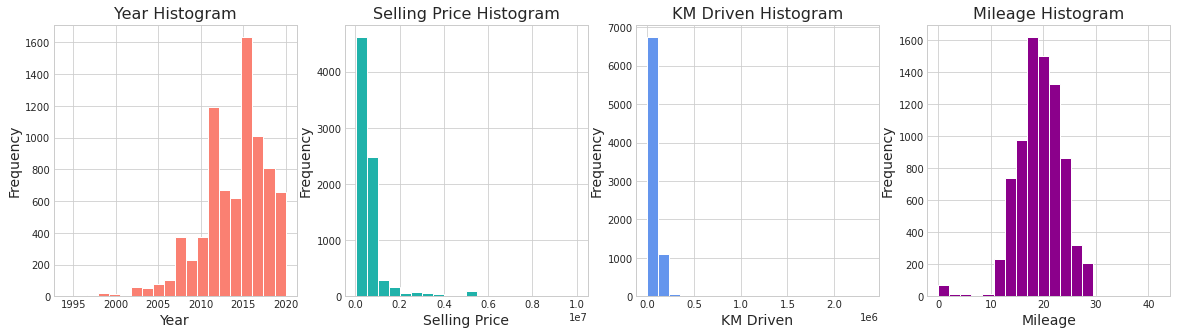

In [19]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].hist(new_dataset["year"], bins=20, facecolor = 'salmon',  edgecolor='white')
ax[0].set_title("Year Histogram", fontsize=16)
ax[1].hist(new_dataset['selling_price'], bins=20,  facecolor = 'lightseagreen',  edgecolor='white')
ax[1].set_title("Selling Price Histogram", fontsize=16)
ax[2].hist(new_dataset["km_driven"], bins=20,  facecolor = 'cornflowerblue',  edgecolor='white')
ax[2].set_title("KM Driven Histogram", fontsize=16)
ax[3].hist(new_dataset["mileage"], bins=20,  facecolor = 'darkmagenta',  edgecolor='white')
ax[3].set_title("Mileage Histogram", fontsize=16)

for i in range(4):
    ax[i].set_ylabel("Frequency", fontsize=14)

ax[0].set_xlabel("Year", fontsize=14)
ax[1].set_xlabel("Selling Price", fontsize=14)
ax[2].set_xlabel("KM Driven", fontsize=14)
ax[3].set_xlabel("Mileage", fontsize=14)

**Membuat dataset yang sudah difilter (tanpa outliers) untuk kepentingan visualisasi Histogram**

In [20]:
filtered_dataset = new_dataset[(new_dataset['year'] >= lower_limit[0])
                    & (new_dataset['selling_price'] <= upper_limit[1])
                    & (new_dataset['km_driven'] <= upper_limit[2])
                    & (new_dataset['mileage'] >= lower_limit[3]) & (new_dataset['mileage'] <= upper_limit[3])]
filtered_dataset

,year,selling_price,km_driven,mileage,age
0,2014,450000,145500,23.40,7
1,2014,370000,120000,21.14,7
2,2006,158000,140000,17.70,15
3,2010,225000,127000,23.00,11
4,2007,130000,120000,16.10,14
...,...,...,...,...,...
7814,2013,320000,110000,18.50,8
7815,2007,135000,119000,16.80,14
7816,2009,382000,120000,19.30,12
7817,2013,290000,25000,23.57,8


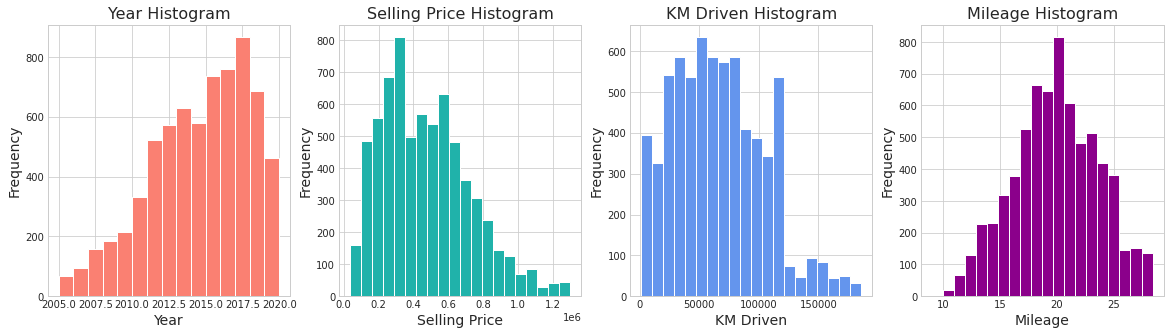

In [21]:
# Histogram tanpa outliers
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].hist(filtered_dataset["year"], bins=15,  facecolor = 'salmon',  edgecolor='white')
ax[0].set_title("Year Histogram", fontsize=16)
ax[1].hist(filtered_dataset['selling_price'], bins=20,  facecolor = 'lightseagreen',  edgecolor='white')
ax[1].set_title("Selling Price Histogram", fontsize=16)
ax[2].hist(filtered_dataset["km_driven"], bins=20,  facecolor = 'cornflowerblue',  edgecolor='white')
ax[2].set_title("KM Driven Histogram", fontsize=16)
ax[3].hist(filtered_dataset["mileage"], bins=20,  facecolor = 'darkmagenta',  edgecolor='white')
ax[3].set_title("Mileage Histogram", fontsize=16)

for i in range(4):
    ax[i].set_ylabel("Frequency", fontsize=14)

ax[0].set_xlabel("Year", fontsize=14)
ax[1].set_xlabel("Selling Price", fontsize=14)
ax[2].set_xlabel("KM Driven", fontsize=14)
ax[3].set_xlabel("Mileage", fontsize=14)

### Boxplot

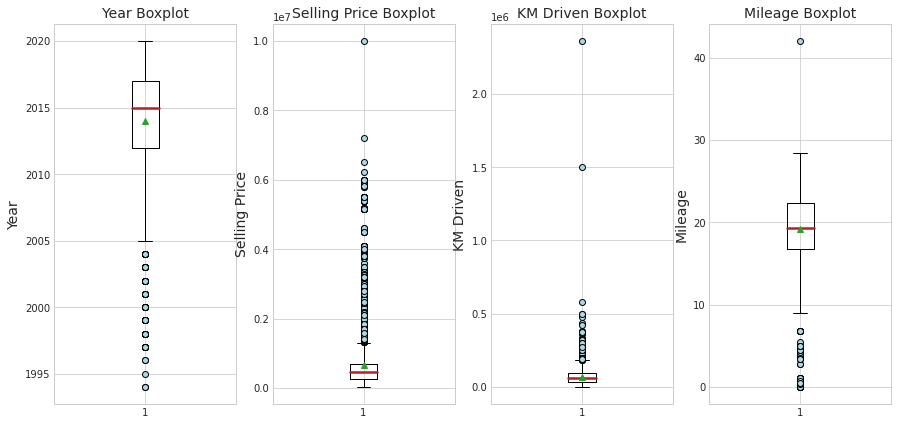

In [22]:
fig1, ax1 = plt.subplots(1, 4, figsize=(15,7))
plt.style.use('seaborn-whitegrid')
blue_circle = dict(markerfacecolor='lightblue', marker='o')
median_line = dict(linestyle='-', linewidth=2.5, color='firebrick')

ax1[0].boxplot(new_dataset['year'], flierprops=blue_circle, medianprops=median_line, showmeans=True)
ax1[0].set_title('Year Boxplot', fontsize=14)
ax1[1].boxplot(new_dataset['selling_price'], flierprops=blue_circle, medianprops=median_line, showmeans=True)
ax1[1].set_title('Selling Price Boxplot', fontsize=14)
ax1[2].boxplot(new_dataset['km_driven'], flierprops=blue_circle, medianprops=median_line, showmeans=True)
ax1[2].set_title('KM Driven Boxplot', fontsize=14)
ax1[3].boxplot(new_dataset['mileage'], flierprops=blue_circle, medianprops=median_line, showmeans=True)
ax1[3].set_title('Mileage Boxplot', fontsize=14)

ax1[0].set_ylabel("Year", fontsize=14)
ax1[1].set_ylabel("Selling Price", fontsize=14)
ax1[2].set_ylabel("KM Driven", fontsize=14)
ax1[3].set_ylabel("Mileage", fontsize=14)

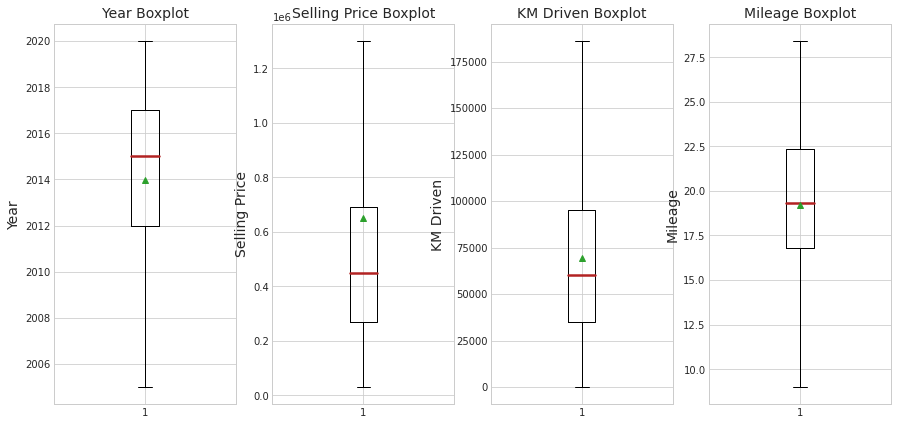

In [23]:
# Boxplot tanpa outliers, hanya menambahkan parameter showfliers=False
fig2, ax2 = plt.subplots(1, 4, figsize=(15,7))
plt.style.use('seaborn-whitegrid')

ax2[0].boxplot(new_dataset['year'], flierprops=blue_circle, medianprops=median_line, showmeans=True, showfliers=False)
ax2[0].set_title('Year Boxplot', fontsize=14)
ax2[1].boxplot(new_dataset['selling_price'], flierprops=blue_circle, medianprops=median_line, showmeans=True, showfliers=False)
ax2[1].set_title('Selling Price Boxplot', fontsize=14)
ax2[2].boxplot(new_dataset['km_driven'], flierprops=blue_circle, medianprops=median_line, showmeans=True, showfliers=False)
ax2[2].set_title('KM Driven Boxplot', fontsize=14)
ax2[3].boxplot(new_dataset['mileage'], flierprops=blue_circle, medianprops=median_line, showmeans=True, showfliers=False)
ax2[3].set_title('Mileage Boxplot', fontsize=14)

ax2[0].set_ylabel("Year", fontsize=14)
ax2[1].set_ylabel("Selling Price", fontsize=14)
ax2[2].set_ylabel("KM Driven", fontsize=14)
ax2[3].set_ylabel("Mileage", fontsize=14)

## Laporan Singkat

Berdasarkan data yang kami olah diatas, kami memperoleh hasil bahwa rata-rata tahun mobil yang sedang dijual saat ini berasal dari tahun 2013, sedangkan paling banyak (modus) mobil-mobil tersebut ada pada keluaran tahun 2017. Mobil yang paling tua adalah mobil tahun 1994 dan mobil terbaru tahun 2020.

Kemudian, dari harga jual (selling_price) rata-rata mempunyai harga 649813.72 US Dolar, dan harga yang paling banyak dijumpai (modus) adalah 300000 USD. Harga jual tertinggi adalah 10 juta USD dan harga termurahnya adalah 29.9 ribu USD. Data harga jual mobil bekas ini cukup bervariasi jika dilihat dari standar deviasinya, yaitu sebesar 813531.29 USD. Standar deviasi ini merupakan rentang seberapa jauh harga bisa berbeda dari harga rata-rata.

Selanjutnya mengenai data seberapa jauh mobil tersebut telah dikendarai sampai pada saat dijual (km_driven). Rata-rata jarak tempuhnya sebesar 69188.65 km. Namun, kebanyakan dari mobil-mobil tersebut telah dikendarai dengan jarak 120000 km. Jarak tempuh tertingginya 2360457 km. Data ini memiliki variansi data yang cukup besar dan nilai standar deviasi sebesar 56788.70 km. Terdapat satu mobil yang memiliki jarak tempuh sebesar 1 km. 

Terakhir, tingkat konsumsi BBM dari mobil (mileage) memiliki rata-rata sebesar 19.20 kmpl, sedangkan kebanyakan mobil memiliki konsumsi bbm 18.9 kmpl. Standar deviasinya tidak terlalu besar, yaitu 4.36 kmpl. Konsumsi BBM paling hemat/irit yaitu 42 kmpl dan yang paling boros (kemungkinan rusak) adalah 0 kmpl. <br><br>

Setelah kami mengolah data, kami menemukan beberapa fakta menarik yang didapatkan dari nilai min dan max tiap kolom, diantaranya adalah:
1. Terdapat 17 mobil yang memiliki nilai 0 kmpl pada kolom mileage. Hal ini sepertinya 'mustahil'. Karena jika 0 kmpl maka mobil itu sama saja tidak bisa dikendarai. Kemungkinan kedua adalah jika harga mobil cenderung murah dan merupakan mobil tua, maka mobil yang sudah rusak total ini dijual untuk diambil bagian yang masih berguna untuk perakitan mobil bekas lain dan sebagainya. Kemungkinan ketiga adalah terdapat kesalahan input data. 


2. Terdapat 1 mobil yang memiliki nilai 42 kmpl di kolom mileage, sekaligus merupakan nilai mileage yang tertinggi. Mobil tersebut unik karena mobil pada zaman ini paling irit hanya mencapai 22 kmpl. Jika mobil tersebut bertenaga listrik, maka konsumsi sebesar 42 kmpl merupakan hal yang mungkin-mungkin saja. Tetapi, tidak ada mobil pada dataset yang bertenaga listrik. Maka, untuk kategori mobil yang tidak bertenaga listrik, mobil ini termasuk mobil yang unik dan berkualitas sangat baik. Selain itu, mobil yang sama juga memiliki max_power yang sangat tinggi, yaitu sebesar 400 bhp. Tentu, untuk kualitas mobil sebaik ini, tidak mengherankan jika mobil ini memiliki harga yang paling mahal di antara seluruh mobil lain di dataset ini, yaitu sebesar 10 juta USD.


3. Terdapat 1 mobil yang memiliki nilai km_driven sangat tinggi, sekaligus tertinggi. Km_driven dari mobil ini sudah mencapai 2.360.457 km. Sedangkan mileage dari mobil tersebut tidak tergolong irit (18.6 kmpl). Jadi, ternyata bukan mobil dengan mileage yang paling irit yang memiliki km_driven paling banyak.


4. Terdapat 1 mobil yang memiliki km_driven sangat rendah, sekaligus merupakan nilai km_driven yang terkecil, yaitu 1 km. Mobil tersebut diproduksi pada tahun 2011 (sudah berusia 10 tahun) dan tertera pada kolom owner bahwa pemiliki mobil terakhir merupakan pemilik ke-4 atau lebih. Artinya, tidak mungkin mobil tersebut memiliki km_driven sebesar 1 km. Mobil yang baru keluar dari dealer pun sudah memiliki jarak tempuh puluhan km untuk inspeksi. Oleh karena itu, penjelasan yang paling masuk akal adalah terdapat kesalahan input data pada kolom km_driven. 

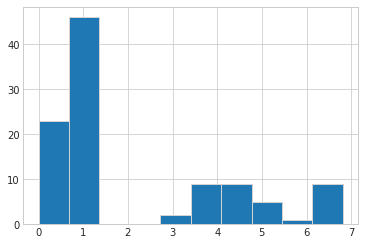

In [24]:
# visualisasi fakta menarik no 1
low_mileage = dataset[dataset['mileage'] < lower_limit[3]]
plt.hist(low_mileage['mileage'], edgecolor='lightgrey')

In [25]:
# fakta menarik no 1
lowest_mileage = dataset[dataset['mileage'] == 0.0]
lowest_mileage

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
620,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172 CC,65 bhp,"9.8@ 3,000(kgm@ rpm)",5.0
753,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086 CC,62 bhp,96.1Nm@ 3000rpm,5.0
1589,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62 bhp,96.1Nm@ 3000rpm,5.0
1614,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987 CC,165 bhp,510@ 1600-2400,5.0
2059,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179 CC,115 bhp,400 Nm /2000 rpm,5.0
2275,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
2610,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
4346,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987 CC,165 bhp,510@ 1600-2400,5.0
5074,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62 bhp,96.1Nm@ 3000rpm,5.0
5605,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197 CC,103.25 bhp,175nm@ 1500-4100rpm,5.0


In [26]:
# fakta menarik no 2
highest_mileage = dataset[dataset['mileage'] == 42.0]
highest_mileage

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
161,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969 CC,400 bhp,640Nm@ 1740rpm,4.0


In [27]:
# fakta menarik no 3
most_used = dataset['km_driven'].sort_values(ascending=False).head(1).index
dataset.iloc[most_used]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3339,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [28]:
# fakta menarik no 4
lowest_kmdriven = dataset[dataset['km_driven'] == 1]
lowest_kmdriven

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7905,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,0.48924,1196 CC,73 bhp,101Nm@ 3000rpm,5.0


## Jawaban Diskusi
### No. 1
Seberapa ‘terpencil’/’jauh’ mobil-mobil bekas dengan #selling_price lebih dari USD 5 juta, dibandingkan dengan data mobil-mobil lainnya? Bagaimana Anda mengungkapkan hal ini secara kuantitatif?

In [29]:
price_outliers = new_dataset[new_dataset['selling_price'] > 5000000]
price_outliers

,year,selling_price,km_driven,mileage,age
124,2019,5150000,20000,22.37,2
128,2017,6000000,37000,13.50,4
130,2019,5800000,7500,16.78,2
139,2017,5850000,47000,13.50,4
161,2017,10000000,30000,42.00,4
...,...,...,...,...,...
7454,2019,5200000,10000,18.12,2
7555,2019,5150000,20000,22.37,2
7568,2019,5400000,7500,16.78,2
7569,2019,5500000,8500,16.78,2


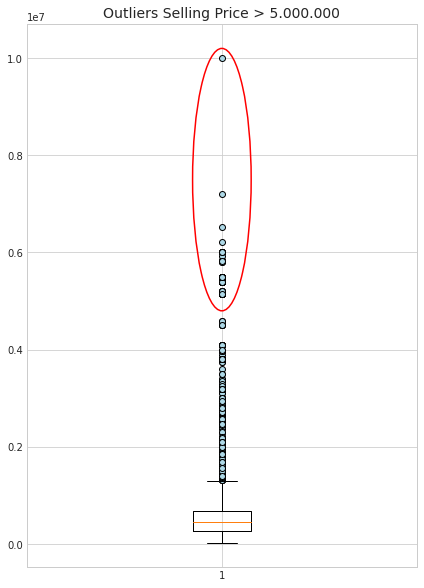

In [30]:
# Visualisasi selling_price yang lebih dari 5 juta USD
from matplotlib.patches import Ellipse

plt.figure(figsize=(7,10))
ax = plt.gca()

plt.boxplot(new_dataset['selling_price'], flierprops=blue_circle)
plt.title(label='Outliers Selling Price > 5.000.000', fontsize=14)

ellipse = Ellipse(xy=(1, 7500000), width=0.15, height=5400000, fc='None', ec='red', lw=1.5)
ax.add_patch(ellipse)

In [31]:
price_outliers.iloc[:,1] = price_outliers.iloc[:,1] - mean[1]
price_outliers.iloc[:,1].mean()

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


4823511.065479858

Rata-rata dari selisih setiap harga outlier dengan rata-rata harga normal adalah 4823511.0655

Maka, rata-rata harga mobil bekas yang lebih dari 5 juta USD terpencil sejauh 4823511.0655 dari rata-rata harga mobil bekas pada umumnya.

### No. 2
Anda hendak mengumpulkan mobil-mobil jarang dipakai yaitu kumpulan 
mobil bekas dengan #km_driven terendah dan melabeli kumpulan mobil
tersebut ‘mobil jarang dipakai’. Berapakah batas minimal #km_driven
yang perlu Anda tetapkan jika Anda menghendaki bahwa hanya terdapat 
sekitar 0,1% saja mobil bekas yang dapat tergolong sebagai ‘mobil-mobil
bekas jarang dipakai’?

In [32]:
# Mencari berapa banyak 0.1% dari keseluruhan dataset
a = round(len(new_dataset) * 0.001)
a

8

In [33]:
# Mencari 0.1% dengan km_driven terkecil untuk dikelompokkan sebagai mobil bekas jarang dipakai
rarely_used = new_dataset['km_driven'].sort_values().head(a)
rarely_used

7905       1
2838    1000
381     1000
7141    1000
7200    1000
7292    1000
6380    1000
5918    1300
Name: km_driven, dtype: int64

Batas minimal km_driven yang perlu ditetapkan untuk mengkategorikan 0.1% mobil bekas sebagai mobil bekas jarang dipakai adalah 1300 km. Dimana terdapat 8 unit mobil bekas yang tergolong mobil bekas jarang dipakai.

### No. 3
Mobil keluaran #km_driven terendah atau #selling_price tertinggi tidak 
menjadi jaminan bahwa mobil bekas tersebut berkualitas baik dan cocok 
untuk kantong anda. Sebagai contoh, sebuah mobil bekas mungkin 
keluaran #km_driven terendah atau #selling_price tertinggi, namun 
rupanya produksi #year lama dan atau #kmpl yang rendah. Bagaimana 
Anda sebaiknya mengidentifikasi mobil bekas yang berkualitas baik 
berdasarkan empat data numerik yang diberikan?

Mobil bekas berkualitas baik:

1) Selling_price tidak terlalu tinggi dan tidak terlalu rendah. Selling price tinggi tidak selalu memiliki kualitas yang baik. Namun, selling price yang rendah cenderung berkualitas rendah. 
2) Km_driven rendah. Jika terlalu tinggi, unit berpotensi rusak karena sudah sering digunakan.
3) Kmpl tinggi. Semakin tinggi, maka semakin berkualitas karena semakin irit.
4) Age rendah. Semakin rendah, maka unit berkualitas karena masih tergolong baru.

In [34]:
# Memfilter data sesuai kriteria mobil bekas berkualitas baik di atas
filtered_dataset2 = new_dataset[(new_dataset['selling_price'] <= mean[1])  # selling_price semurah mungkin
                    & (new_dataset['km_driven'] <= mean[2] - stdev[2])  # km_driven sekecil mungkin
                    & (new_dataset['mileage'] >= mean[3] + stdev[3])  # mileage sebesar mungkin
                    & (new_dataset['age'] <= mean[4]) - stdev[4]]  # age sekecil mungkin

filtered_dataset2 = filtered_dataset2.drop(['year'], axis=1)

filtered_dataset2

,selling_price,km_driven,mileage,age
42,390000,10300,23.95,3
152,175000,11000,23.95,10
250,550000,2000,25.40,4
590,550000,10000,24.00,2
684,45000,10000,26.00,10
720,390000,6000,23.95,1
886,340000,10000,25.17,3
1120,310000,11500,25.17,5
1178,395000,10000,25.17,2
1490,525000,9200,23.84,2


In [35]:
# Melihat jumlah mobil bekas berkualitas
filtered_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 42 to 7636
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  33 non-null     int64  
 1   km_driven      33 non-null     int64  
 2   mileage        33 non-null     float64
 3   age            33 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.3 KB


Terdapat 33 mobil bekas berkualitas baik yang kami rekomendasikan berdasarkan parameter harga jual, km yang sudah ditempuh, jarak tempuh per liter bahan bakar, dan usia mobil. 

Berikut adalah distribusi ke-33 mobil data tersebut (Histogram).

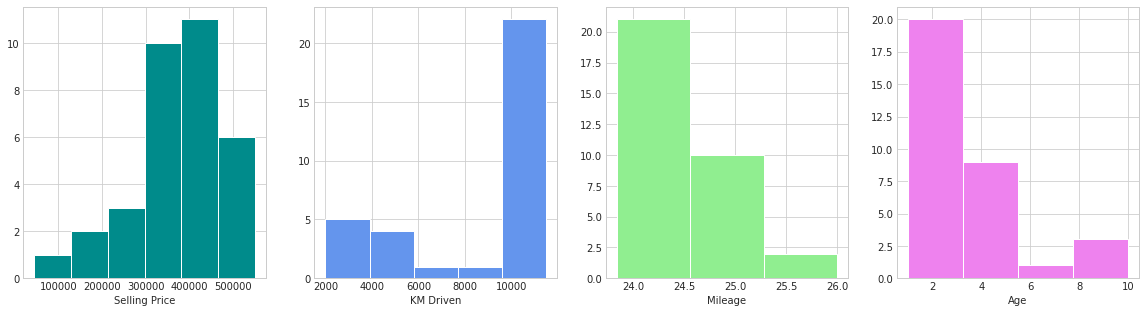

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
ax[0].hist(filtered_dataset2["selling_price"], bins=6, edgecolor='white', facecolor='darkcyan')
ax[1].hist(filtered_dataset2["km_driven"], bins=5, edgecolor='white', facecolor='cornflowerblue')
ax[2].hist(filtered_dataset2["mileage"], bins=3, edgecolor='white', facecolor='lightgreen')
ax[3].hist(filtered_dataset2["age"], bins=4, edgecolor='white', facecolor='violet')

ax[0].set_xlabel("Selling Price")
ax[1].set_xlabel("KM Driven")
ax[2].set_xlabel("Mileage")
ax[3].set_xlabel("Age")

**Menampilkan rekomendasi mobil bekas berkualitas terbaik beserta seluruh keterangan detailnya**

In [37]:
# Mengakses index mobil bekas berkualitas terbaik
index_mobil_berkualitas = np.array(filtered_dataset2.index)
index_mobil_berkualitas

array([  42,  152,  250,  590,  684,  720,  886, 1120, 1178, 1490, 1602,
       2009, 2261, 2266, 2270, 2407, 2512, 2811, 3263, 3344, 3460, 4608,
       4842, 6262, 6542, 6604, 6795, 7144, 7295, 7370, 7372, 7436, 7636])

In [38]:
# Mobil bekas berkualitas terbaik
dataset.iloc[index_mobil_berkualitas]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
42,Maruti Alto K10 VXI,2018,390000,10300,Petrol,Dealer,Manual,First Owner,23.95,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
152,Maruti Alto K10 VXI,2011,175000,11000,Petrol,Dealer,Manual,First Owner,23.95,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
250,Hyundai Xcent 1.2 CRDi E,2017,550000,2000,Diesel,Individual,Manual,Second Owner,25.40,1186 CC,73.97 bhp,190.25nm@ 1750-2250rpm,5.0
590,Tata Tiago NRG Petrol,2019,550000,10000,Petrol,Individual,Manual,First Owner,24.00,1199 CC,83.81 bhp,114Nm@ 3500rpm,5.0
684,Tata Nano Cx,2011,45000,10000,Petrol,Individual,Manual,Third Owner,26.00,624 CC,35 bhp,48Nm@ 3000rpm,4.0
720,Maruti Alto K10 VXI,2020,390000,6000,Petrol,Individual,Manual,First Owner,23.95,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
886,Renault KWID RXT Optional,2018,340000,10000,Petrol,Individual,Manual,First Owner,25.17,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
1120,Renault KWID RXT Optional,2016,310000,11500,Petrol,Individual,Manual,First Owner,25.17,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
1178,Renault KWID RXT Optional,2019,395000,10000,Petrol,Individual,Manual,First Owner,25.17,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
1490,Tata Tiago 1.2 Revotron XZA,2019,525000,9200,Petrol,Individual,Automatic,First Owner,23.84,1199 CC,83.83 bhp,114Nm@ 3500rpm,5.0
